# ==========================================================================
# 📝 Tarea: Reducción de la Numerosidad con CNN, ENN y K-medias usando SVM
# 📊 Dataset: Breast Cancer (Scikit-Learn)
# 👤 Autor/a:
# 📅 Fecha: 20/Mayo/2025
# ==========================================================================

## 🔍 Descripción:
En este cuaderno aplicarás técnicas de reducción de la numerosidad (CNN, ENN, K-medias) al conjunto de datos Breast Cancer y analizarás su efecto en el rendimiento de un modelo SVM.

## ==========================================================================

## 1. Cargar librerías necesarias
Escribe aquí la importación de librerías: numpy, pandas, matplotlib, seaborn, sklearn (datasets, model_selection, preprocessing, metrics, svm, kmeans), etc.

En el caso de los códigos de ENN, CNN, estos  deberás tomarlos del cuaderno que contiene la teoría y ejemplos.

In [20]:
def separador():
    print("\n" + "=" * 170 + "\n")
def header(Titulo):
  por=((170-len(Titulo))//10)
  a=int(1.2*por)
  print("."*a+"·"*a+"~"*a+"≈"*a+"≋"
  *int(por*.2),Titulo,"≋"*int(por*.2)
  +"≈"*a+"~"*a+"·"*a+"."*a,"\n\n")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils.validation import check_X_y
import random
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

# --------------------------------------------------------------------------

## 2. Cargar y explorar el conjunto de datos Breast Cancer
- Cargar el dataset con sklearn.datasets.load_breast_cancer
- Explora las dimensiones, variables, y distribución de clases

.............·············~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ 2. Cargar y explorar el conjunto de datos Breast Cancer ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~·············............. 


primeras 5 filas
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520 

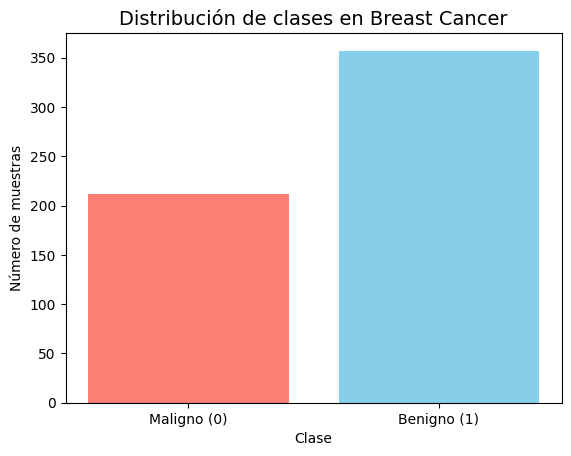

In [21]:
header("2. Cargar y explorar el conjunto de datos Breast Cancer")
#carga del dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df=pd.DataFrame(data.data, columns=data.feature_names)
y=data.target
print('primeras 5 filas')
print(df.head())
separador()
#filas y columnas del dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")
separador()
#nombre de las columnas
print("Las columnas del dataset son:")
print(df.columns)
separador()
#tipos de datos de las columnas
print("Los tipos de datos de las columnas son:")
print(df.dtypes)
separador()
# Conteo de cada clase
unique, counts = np.unique(y, return_counts=True)
for label, cnt in zip(unique, counts):
    nombre = "Maligno" if label == 0 else "Benigno"
    print(f"Clase {label} ({nombre}): {cnt} muestras ({cnt/len(y)*100:.1f} %)")

plt.bar(["Maligno (0)", "Benigno (1)"], counts, color=["salmon", "skyblue"])
plt.xlabel("Clase")
plt.ylabel("Número de muestras")
plt.title("Distribución de clases en Breast Cancer", size=14)
plt.show();separador()


# --------------------------------------------------------------------------

## 3. Preprocesamiento
 - Escalamiento de características (StandardScaler)
 - División del conjunto en entrenamiento y prueba
 - usar hold-out de 70% y 30%



In [22]:
header("3. Preprocesamiento")
escaler=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(df, data.target, test_size=0.3, random_state=11, stratify=y)
#primero se divide para escalar solo el conjunto de entrenamiento
X_train_sc=escaler.fit_transform(X_train)
X_test_sc=escaler.transform(X_test)

print(f"El conjunto de entrenamiento tiene {X_train_sc.shape[0]} filas y {X_train_sc.shape[1]} columnas")
print(f"El conjunto de prueba tiene {X_test_sc.shape[0]} filas y {X_test_sc.shape[1]} columnas")

..................··················~~~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋≋ 3. Preprocesamiento ≋≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~~~··················.................. 


El conjunto de entrenamiento tiene 398 filas y 30 columnas
El conjunto de prueba tiene 171 filas y 30 columnas


# --------------------------------------------------------------------------

## 4. Aplicar técnica CNN (Condensed Nearest Neighbor)

- Aplicar CNN sobre el conjunto de entrenamiento
- Mostrar el tamaño del conjunto reducido



In [23]:
class CNN:
    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors
        self.classifier = KNeighborsClassifier(n_neighbors=self.n_neighbors)
        self.sample_indices_ = []

    def select_data(self, X, y):
        # Validación de entrada: datos densos
        X, y = check_X_y(X, y, accept_sparse=False)

        idx_s = []  # índice de instancias seleccionadas
        classes = np.unique(y)
        self.classes_ = classes

        # Iniciar con una instancia aleatoria por clase
        for cur_class in classes:
            mask = np.where(y == cur_class)[0]
            choose_id = random.choice(mask)
            idx_s.append(choose_id)

        # Revisión aleatoria del resto de las instancias
        train_idx = list(range(len(y)))
        random.shuffle(train_idx)

        flag = True
        while flag:
            flag = False
            self.classifier.fit(X[idx_s], y[idx_s])
            for idx in train_idx:
                if idx not in idx_s:
                    x_i = X[idx].reshape(1, -1)
                    if self.classifier.predict(x_i) != [y[idx]]:
                        idx_s.append(idx)
                        self.classifier.fit(X[idx_s], y[idx_s])
                        flag = True

        self.X_ = X[idx_s]
        self.y_ = y[idx_s]
        self.sample_indices_ = sorted(idx_s)
        self.reduction_ = 1.0 - len(self.y_) / len(y)
        return self.X_, self.y_


.............·············~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ 4. Aplicar técnica CNN (Condensed Nearest Neighbor) ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~·············............. 




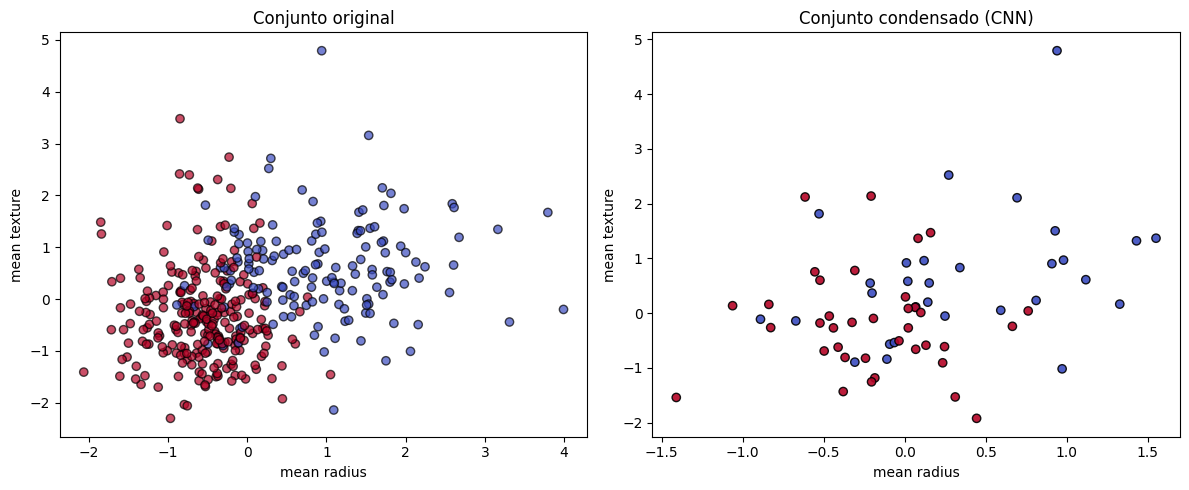

Instancias originales: 398
Instancias tras CNN:   67
Reducción: 83.17%


In [24]:
header("4. Aplicar técnica CNN (Condensed Nearest Neighbor)")
target=load_breast_cancer()
feature_names = target.feature_names

cnn = CNN(n_neighbors=1)
X_train_cnn, y_train_cnn = cnn.select_data(X_train_sc, y_train)

# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train_sc[:, 0], X_train_sc[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("Conjunto original")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.subplot(1, 2, 2)
plt.scatter(X_train_cnn[:, 0], X_train_cnn[:, 1], c=y_train_cnn, cmap='coolwarm', edgecolor='k', alpha=0.9)
plt.title("Conjunto condensado (CNN)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.tight_layout()
plt.show()

print(f"Instancias originales: {len(y_train)}")
print(f"Instancias tras CNN:   {len(y_train_cnn)}")
print(f"Reducción: {100 * cnn.reduction_:.2f}%")


 --------------------------------------------------------------------------

## 5. Aplicar técnica ENN (Edited Nearest Neighbor)

- Aplicar ENN sobre el conjunto de entrenamiento
- Mostrar el tamaño del conjunto reducido



In [25]:
class ENN:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.classifier = KNeighborsClassifier(n_neighbors=self.n_neighbors)
        self.sample_indices_ = []

    def fit(self, X, y):
        # Validación inicial
        X, y = check_X_y(X, y, accept_sparse=False)

        mask = np.ones(len(y), dtype=bool)
        tmp_m = np.ones(len(y), dtype=bool)

        indices = list(range(len(y)))
        random.shuffle(indices)

        for i in indices:
            tmp_m[i] = False
            self.classifier.fit(X[tmp_m], y[tmp_m])
            x_i = X[i].reshape(1, -1)
            y_pred = self.classifier.predict(x_i)
            if y_pred[0] != y[i]:
                mask[i] = False
            tmp_m[i] = True

        self.X_ = X[mask]
        self.y_ = y[mask]
        self.sample_indices_ = np.where(mask)[0]
        self.reduction_ = 1 - len(self.y_) / len(y)
        return self


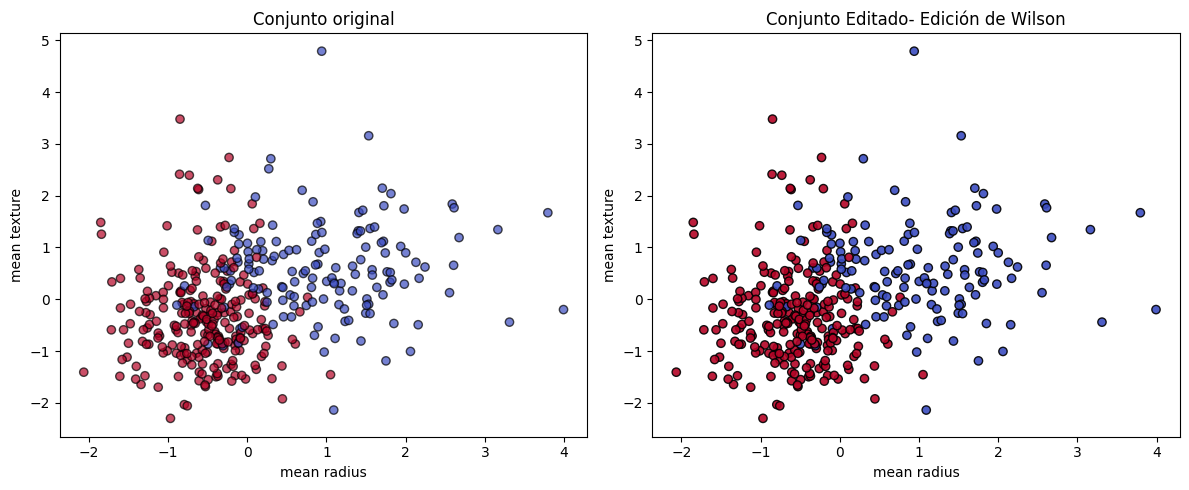

Instancias originales: 398
Instancias tras CNN:   384
Reducción: 3.52%


In [26]:
# Aplicar ENN
selector = ENN(n_neighbors=5)
selector.fit(X_train_sc, y_train)

# Seleccionar subconjunto
idx = selector.sample_indices_
X_clean, y_clean = X_train_sc[idx], y_train[idx]

# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train_sc[:, 0], X_train_sc[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("Conjunto original")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.subplot(1, 2, 2)
plt.scatter(X_clean[:, 0], X_clean[:, 1], c=y_clean, cmap='coolwarm', edgecolor='k', alpha=0.9)
plt.title("Conjunto Editado- Edición de Wilson")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.tight_layout()
plt.show()

print(f"Instancias originales: {len(y_train)}")
print(f"Instancias tras CNN:   {len(y_clean)}")
print(f"Reducción: {100 * selector.reduction_:.2f}%")


# --------------------------------------------------------------------------

## 6. Aplicar reducción mediante K-medias
- Realizar agrupamiento por clase y representar cada grupo con su centroide. Elige la mitad de los elementos de cada clase como el valor del número de centroides
- Generar un nuevo conjunto reducido con los centroides como prototipos



...............···············~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ 6. Aplicar reducción mediante K-medias ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~···············............... 




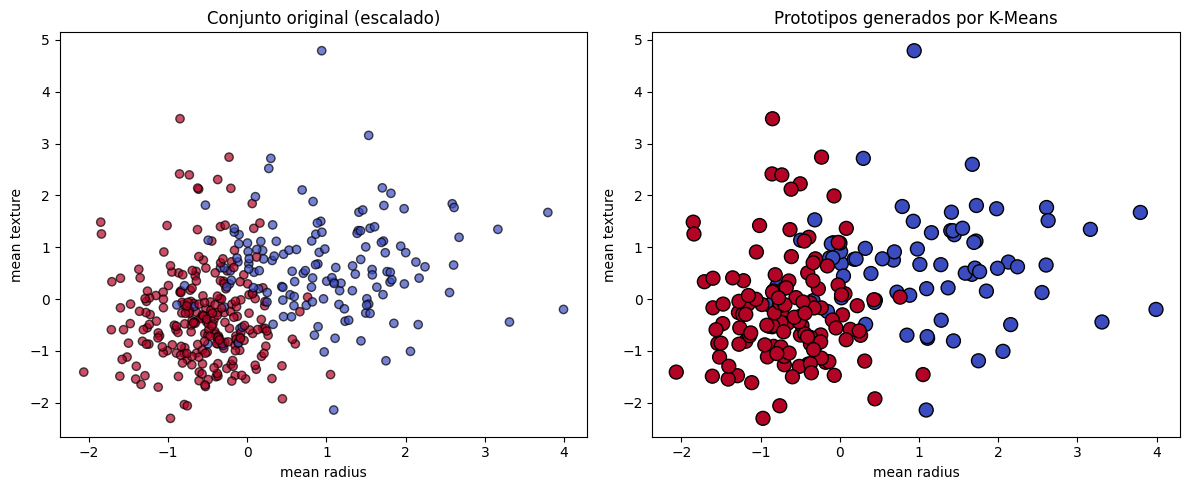

Instancias originales: 398
Instancias tras CNN:   199
Reducción: 50.00%


In [27]:
header("6. Aplicar reducción mediante K-medias")

classes = np.unique(y_train)

# 4. Aplicar KMeans por clase
prototypes = []
labels = []

for c in classes:
    # Subconjunto de la clase actual
    class_data = X_train_sc[y_train == c]
    prototypes_per_class = len(class_data)//2

    # KMeans sobre los datos de la clase
    kmeans = KMeans(n_clusters=prototypes_per_class, random_state=42)
    kmeans.fit(class_data)

    # Guardar prototipos y sus etiquetas
    prototypes.append(kmeans.cluster_centers_)
    labels.extend([c] * prototypes_per_class)

# 5. Concatenar resultados
X_proto = np.vstack(prototypes)
y_proto = np.array(labels)

# 6. Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Conjunto original
axes[0].scatter(X_train_sc[:, 0], X_train_sc[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', alpha=0.7)
axes[0].set_title("Conjunto original (escalado)")
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[1])


# Prototipos generados
axes[1].scatter(X_proto[:, 0], X_proto[:, 1], c=y_proto, cmap='coolwarm', edgecolor='k', s=100)
axes[1].set_title("Prototipos generados por K-Means")
axes[1].set_xlabel(feature_names[0])
axes[1].set_ylabel(feature_names[1])

plt.tight_layout()
plt.show()
print(f"Instancias originales: {len(y_train)}")
print(f"Instancias tras CNN:   {len(y_proto)}")
print(f"Reducción: {100 * (1 - len(y_proto) / len(y_train)):.2f}%")

 --------------------------------------------------------------------------

##7. Entrenar SVM sobre cada conjunto reducido
- Entrenar un modelo SVM (SVC) sobre:
 * los datos originales
 * datos reducidos con CNN
 * datos reducidos con ENN
 * datos reducidos con K-medias
- Evaluar cada modelo con accuracy, F1-score



In [28]:
header('7. Entrenar SVM sobre cada conjunto reducido')
#diccionario con los resultados de los 4 metodos usados anteriormente
resultados={'Datos originales':(X_train_sc, y_train),
            'Técnica CNN':(X_train_cnn, y_train_cnn),
            'Técnica ENN':(X_clean, y_clean),
            'Técnica k-means':(X_proto, y_proto)}

#funcion para iterarlas y aplicar svm
def modelo_svm(resultados, X_test, y_test):
    for nombre, (X_train, y_train) in resultados.items():
        print(f"Modelo: {nombre}")
        clf = SVC(kernel='linear')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1-score: {f1:.4f}")
        separador()


def modelo_svmkernel(resultados, X_test, y_test):
    for nombre, (X_train, y_train) in resultados.items():
        print(f"Modelo: {nombre}")
        clf = SVC(kernel='rbf')
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1-score: {f1:.4f}")
        separador()

modelo_svm(resultados, X_test_sc, y_test)
#header('con kernel rbf')
#modelo_svmkernel(resultados, X_test_sc, y_test)

..............··············~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ 7. Entrenar SVM sobre cada conjunto reducido ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~··············.............. 


Modelo: Datos originales
Accuracy: 0.9708
F1-score: 0.9770


Modelo: Técnica CNN
Accuracy: 0.9591
F1-score: 0.9674


Modelo: Técnica ENN
Accuracy: 0.9532
F1-score: 0.9636


Modelo: Técnica k-means
Accuracy: 0.9532
F1-score: 0.9640




# --------------------------------------------------------------------------

## 📊 8. Comparar los resultados y reflexión final
**- Comparar las métricas de rendimiento obtenidas con cada técnica**

La comparación se llevó a cabo en la celda anterior.

**- Escribe tus conclusiones sobre el impacto de la reducción de la numerosidad**

La reducción en el número de instancias se llevó a cabo por 3 técnicas (CNN, ENN y K-Means) que tienen en común que sacrifican un poco de su desempeño en mértricas a cambio de incrementar la velocidad y ahorro de recursos.

**- ¿Cuál técnica funcionó mejor? ¿Qué ventajas y desventajas observaste?**

Las 3 técnicas ahorran recursos, pero en mi opinión:
- CNN.-Redujo las instancias en un 85.2%, ahorrando muchísimos recursos y haciendolo la mejor opción.
- ENN.-Redujo las instancias en solo 3.92%, con las mismas métricas que CNN. Entonces en este ejemplo no vale la pena.
- K-Means, redujo las instancias en un 50%, con un accuracy igual y f1-score .01 mejor que CNN. Lo que lo hace la segunda mejor opción si lo que se busca es equilibrar los resultados con el ahorro de recursos computacionales y temporales.

En conclusión, en mi opinión en este ejercicio se desempeñó mejor la técnica de reducción  CNN (Condensed Nearest Neighbor).


